# GRADED CHALLENGE 3

Name : Aan Nurliyanah

Batch : 002

# Description 

### Objective

Tugas ini adalah Graded Challenge ketiga , data diambil dari `bigquery-public-data`. Database yang digunakan adalah `thelook_ecommerce`. Database ini berisi beberapa tabel yang menggambarkan data penjualan thelook_ecommerce dari tahun 2018 hingga 2022, yang akan digunakan dalam tugas ini diantaranya tabel order_items dan inventory_items pada tahun 2022 periode Januari hingga September. 

## Assignment Problems

Kamu adalah seorang data analis di The Look yang merupakan salah satu platform e-commerce terbesar di planet Mars. Kamu diminta untuk membuat laporan evaluasi aktivitas penjualan di platform tersebut.

Untuk mempermudah pekerjaan kamu supaya terarah, kamu harus menentukan problem statement dengan success criteria berdasarkan SMART. Namun tantangannya, kamu tentukan problem statement berdasarkan penjabaran-penjabaran analisis dalam bentuk persoalan yang harus kamu jawab menggunakan Query SQL. (SMART akan berdasarkan dari poin-poin penjabaran).

**Poin penjabaran:**

1. Berapa jumlah transaksi yang berstatus `Complete` tiap bulan selama Q1 sampai Q3 di tahun 2022? Insight apa yang bisa kamu berikan?
2. Berikan informasi total penjualan (dalam USD) tiap bulan selama Q1 sampai Q3 di tahun 2022! (Hanya yang transaksi berstatus `Complete`. Apa informasi yang bisa kamu sampaikan?
3. Berapa user yang melakukan transaksi berstatus `Complete` di tiap bulan dari Q1 sampai Q3 2022? Apa kesimpulanmu?
4. Kategori produk apa saja yang paling banyak dibeli (staus transaksi: `Complete`) di tiap bulannya selama Q1 sampai Q3 tahun 2022? Berikan insight!
5. Kategori produk apa saja yang paling banyak mendapatkan pendapatan (staus transaksi: `Complete`) di tiap bulannya selama Q1 sampai Q3 tahun 2022? Berikan insight!
6. Dibandingkan dengan jumlah transaksi dan total penjualan, mana yang paling berkaitan dengan jumlah user yang melakukan transaksi? Apa analisis yang dapat kamu jelaskan? (_Hint: Kamu bisa menggunakan korelasi_)

## Working Area

Mengkoneksikan `BigQuery` ke Google Colab tempat mengerjakan P0-GC3 dengan code berikut:

from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

project_id = "aan-nurliyanah" 
client = bigquery.Client(project=project_id)

### Libraries Used

Library yang saya gunakan dalam tugas ini adalah pandas, matplotlib dan seaborn. 
Selain untuk mengelola dataset , library yang digunakan juga untuk membantu memvisualisasikan hitmap secara sederhana dari analisis data. 

### Data Loading

Pertama import library terlebih dahulu untuk nanti digunakan di analisis. 

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Selanjutnya mengkoneksikan `BigQuery` ke Google Colab tempat mengerjakan P0-GC3 dengan code berikut, untuk project name di GCP saya dengan nama `aan-nurliyanah`. Setelah dijalankan query akan meminta akses ke GCP, lanjutkan hingga result nya 'Authenticated'.

In [35]:
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

project_id = "aan-nurliyanah" 
client = bigquery.Client(project=project_id)

Authenticated


Memanggil dataset yang akan digunakan untuk kita analisis data di dalamnya secara garis besar. Beberapa tabel yang akan digunakan yaitu order_items dan inventory_items. 

In [36]:
tabel_order_items = client.query('''
SELECT * FROM `bigquery-public-data.thelook_ecommerce.order_items`
''').to_dataframe()

tabel_order_items

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,117357,81075,64506,13606,317193,Complete,2022-03-24 02:35:52+00:00,2022-03-22 21:31:00+00:00,2022-03-23 13:56:00+00:00,NaT,2.50
1,109943,75943,60437,13606,297114,Returned,2022-07-12 11:21:04+00:00,2022-07-14 08:28:00+00:00,2022-07-18 05:09:00+00:00,2022-07-20 11:03:00+00:00,2.50
2,115040,79477,63233,13606,310918,Cancelled,2021-02-01 00:37:44+00:00,NaT,NaT,NaT,2.50
3,101593,70239,55908,13606,274521,Processing,2022-07-01 10:39:07+00:00,NaT,NaT,NaT,2.50
4,115531,79811,63515,13606,312258,Processing,2020-11-04 08:40:11+00:00,NaT,NaT,NaT,2.50
...,...,...,...,...,...,...,...,...,...,...,...
180802,159427,110265,88060,3633,430779,Processing,2022-04-23 13:11:57+00:00,NaT,NaT,NaT,9.32
180803,54741,37721,30118,3449,147994,Shipped,2022-06-21 13:16:10+00:00,2022-06-23 06:20:00+00:00,NaT,NaT,9.82
180804,107124,74072,58942,3449,289544,Shipped,2020-10-27 00:21:42+00:00,2020-10-25 02:00:00+00:00,NaT,NaT,9.82
180805,150807,104215,83183,3449,407505,Cancelled,2022-01-01 03:28:00+00:00,NaT,NaT,NaT,9.82


In [37]:
tabel_inventory = client.query('''
SELECT * FROM `bigquery-public-data.thelook_ecommerce.inventory_items`
''').to_dataframe()

tabel_inventory

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,43707,16898,2020-09-28 09:33:52+00:00,2020-11-12 09:22:52+00:00,13.925000,Tops & Tees,Quiksilver Waterman Men's On The Rise,,25.000000,Men,22811EE19846217512507785E74D12CC,3
1,43708,16898,2021-10-22 17:27:00+00:00,NaT,13.925000,Tops & Tees,Quiksilver Waterman Men's On The Rise,,25.000000,Men,22811EE19846217512507785E74D12CC,3
2,43709,16898,2020-03-26 13:46:00+00:00,NaT,13.925000,Tops & Tees,Quiksilver Waterman Men's On The Rise,,25.000000,Men,22811EE19846217512507785E74D12CC,3
3,68041,16898,2020-10-24 00:36:07+00:00,2020-10-30 03:10:07+00:00,13.925000,Tops & Tees,Quiksilver Waterman Men's On The Rise,,25.000000,Men,22811EE19846217512507785E74D12CC,3
4,68042,16898,2020-12-16 04:02:00+00:00,NaT,13.925000,Tops & Tees,Quiksilver Waterman Men's On The Rise,,25.000000,Men,22811EE19846217512507785E74D12CC,3
...,...,...,...,...,...,...,...,...,...,...,...,...
488315,188951,14392,2022-03-11 19:06:49+00:00,2022-03-25 09:11:49+00:00,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9
488316,188952,14392,2021-01-13 01:41:00+00:00,NaT,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9
488317,342018,14392,2020-06-23 17:51:41+00:00,2020-07-21 06:29:41+00:00,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9
488318,342019,14392,2022-09-02 05:30:00+00:00,NaT,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9


### Poin Penjabaran

Soal 1: Berapa jumlah transaksi yang berstatus `Complete` tiap bulan selama Q1 sampai Q3 di tahun 2022? Insight apa yang bisa kamu berikan?

Untuk menghitung jumlah transaksi diperlukan join 2 tabel yaitu order_items dan inventory_item. Hubungan diantara keduanya adalah product_id pada order_items = product_id pada inventory_items. 
Dengan menggabungkan kedua tabel ini kita bisa melihat jumlah transaksi dengan menerapkan fungsi Count di kolom created_at yang kita cari berdasarkan status pada order_items = complete dan dihitung diantara periode Q1 sampai dengan Q3 atau bulan Januari - September 2022 dengan menggunakan fungsi Extract untuk memisahkan/membagi berdasarkan bulan dan quarter dari format datetime(timestamp) pada kolom created_at. 


In [38]:
TOTAL_TRANSAKSI = client.query('''
SELECT 
	EXTRACT(month FROM o.created_at) as BULAN,
  EXTRACT(quarter FROM o.created_at) as QUARTER,
	COUNT(o.created_at) as JUMLAH_TRANSAKSI
FROM bigquery-public-data.thelook_ecommerce.inventory_items as i
JOIN bigquery-public-data.thelook_ecommerce.order_items as o
ON i.product_id = o.product_id
WHERE o.status = 'Complete' AND 
  EXTRACT(year FROM o.created_at) = 2022 AND 
  EXTRACT(quarter FROM o.created_at) BETWEEN 1 AND 3
GROUP BY BULAN, QUARTER
ORDER BY BULAN

''').to_dataframe()

TOTAL_TRANSAKSI

,BULAN,QUARTER,JUMLAH_TRANSAKSI
0,1,1,30694
1,2,1,28771
2,3,1,36596
3,4,2,39251
4,5,2,42266
5,6,2,43319
6,7,3,54017
7,8,3,61919
8,9,3,68960


Berdasarkan perhitungan diatas, didapatkan jumlah transaksi terus mengalami peningkatan di setiap bulan nya. Pada quarter pertama di bulan ke 2 terdapat sedikit penurunan. Namun selebihnya jumlah transaksi dari bulan ke 2 dan seterusnya terus meningkat. Hingga di akhir quarter 3 jumlah transaksi adalah sebanyak 68960 transaksi.

Soal 2 : Berikan informasi total penjualan (dalam USD) tiap bulan selama Q1 sampai Q3 di tahun 2022! (Hanya yang transaksi berstatus `Complete`. Apa informasi yang bisa kamu sampaikan?

Untuk menghitung total_penjualan diperlukan join 2 tabel yaitu order_items dan inventory_item. Hubungan diantara keduanya adalah product_id pada order_items = product_id pada inventory_items. 
Dengan menggabungkan kedua tabel ini kita bisa melihat total_penjualan dengan menerapkan fungsi SUM di kolom sale_price, untuk jumlahnya menggunakan fungsi round juga dimana hasilnya akan dibulatkan. Total penjualan yang kita cari berdasarkan status pada order_items = complete dan dihitung diantara periode Q1 sampai dengan Q3 atau bulan Januari - September 2022 dengan menggunakan fungsi Extract untuk memisahkan/membagi berdasarkan bulan dan quarter dari format datetime(timestamp) pada kolom created_at. 

In [39]:
TOTAL_PENJUALAN = client.query('''
SELECT 
    BULAN, QUARTER,
    round(SUM(sale_price)) AS JUMLAH_PENJUALAN
FROM (SELECT *,
	  EXTRACT(month FROM ord_item.created_at) AS BULAN,
    EXTRACT(quarter FROM ord_item.created_at) AS QUARTER
FROM bigquery-public-data.thelook_ecommerce.inventory_items AS inventori
JOIN bigquery-public-data.thelook_ecommerce.order_items AS ord_item
ON ord_item.product_id = inventori.product_id
WHERE ord_item.status = 'Complete' AND 
    EXTRACT(year FROM ord_item.created_at) = 2022 AND 
    EXTRACT(quarter FROM ord_item.created_at) BETWEEN 1 AND 3)
GROUP BY BULAN, QUARTER
ORDER BY BULAN
''').to_dataframe()

TOTAL_PENJUALAN

,BULAN,QUARTER,JUMLAH_PENJUALAN
0,1,1,1831701.0
1,2,1,1703248.0
2,3,1,2235412.0
3,4,2,2404530.0
4,5,2,2462764.0
5,6,2,2580496.0
6,7,3,3374706.0
7,8,3,3700024.0
8,9,3,4100365.0


Berdasarkan perhitungan nomor 2, didapatkan jumlah penjualan terus mengalami peningkatan pula di setiap bulan nya. Namun pada quarter pertama di bulan ke 2 terdapat sedikit penurunan.Hal ini sejalan dengan banyaknya jumlah transaksi yang terus meningkat, tingkat penjualan pun terus meningkat juga dari bulan ke bulan dan dari quarter ke quarter selanjutnya selama 3 quarter.Penjualan pada quarter 3 di bulan 9 mencapai jumlah penjualan paling tinggi yaitu 4100365.0 USD. Atau mengalami peningkatan sejumlah 10,82 % dari bulan sebelumnya.

Soal 3 :  Berapa user yang melakukan transaksi berstatus `Complete` di tiap bulan dari Q1 sampai Q3 2022? Apa kesimpulanmu?

Untuk menghitung total_user diperlukan join 2 tabel yaitu order_items dan inventory_item. Hubungan diantara keduanya adalah product_id pada order_items = product_id pada inventory_items. 
Dengan menggabungkan kedua tabel ini kita bisa melihat total_user yang melakukan transaksi dengan menerapkan fungsi COUNT DISTINCT di kolom user_id, menerapkan fungsi distinct untuk mencari user id yg unique atau bisa dikatakan, karena 1 user id bisa melakukan banyak transaksi maka kita hanya perlu mengidentifikasi 1 user id tersebut untuk perhitungan nya jadi tidak double.  Perhitungan banyaknya user_id berdasarkan status pada order_items = complete dan dihitung diantara periode Q1 sampai dengan Q3 atau bulan Januari - September 2022 dengan menggunakan fungsi Extract untuk memisahkan/membagi berdasarkan bulan dan quarter dari format datetime(timestamp) pada kolom created_at. 

In [40]:
TOTAL_USER = client.query('''

SELECT
  EXTRACT(month FROM ord.created_at) as BULAN,
  EXTRACT(quarter FROM ord.created_at) as QUARTER,
  COUNT(DISTINCT(ord.user_id)) as JUMLAH_USER
FROM bigquery-public-data.thelook_ecommerce.inventory_items AS invt
JOIN bigquery-public-data.thelook_ecommerce.order_items AS ord
ON ord.product_id = invt.product_id 
WHERE ord.status = 'Complete' AND 
  EXTRACT(year FROM ord.created_at) = 2022 AND 
  EXTRACT(quarter FROM ord.created_at) BETWEEN 1 AND 3
GROUP BY BULAN, QUARTER
ORDER BY BULAN
''').to_dataframe()

TOTAL_USER

,BULAN,QUARTER,JUMLAH_USER
0,1,1,1092
1,2,1,1019
2,3,1,1307
3,4,2,1404
4,5,2,1496
5,6,2,1542
6,7,3,1903
7,8,3,2184
8,9,3,2398


Berdasarkan perhitungan nomor 3 mengenai total user yang melakukan transaksi, didapatkan total_user yang terus mengalami peningkatan di setiap bulan nya. kecuali di bulan 1 ke 2 yang mengalami sedikit penurunan. Selebihnya total_user dari bulan ke 2 dst terus meningkat. Hal ini sejalan dengan perhitungan dari soal nomor 1 dan 2 yaitu jumlah_transaksi dan jumlah_pendapatan. Dapat kita asumsikan bahwa ketika jumlah user meningkat, jumlah transksi akan meningkat pula, sebaliknya jika jumlah user menurun , jumlah transaksi pun akan menurun. Jumlah user tertinggi terdapat pada akhir quarter 3 yaitu sebesar 2398 user.


Soal 4 : Kategori produk apa saja yang paling banyak dibeli (staus transaksi: `Complete`) di tiap bulannya selama Q1 sampai Q3 tahun 2022? Berikan insight!

Untuk menghitung Kategori produk apa saja yang paling banyak dibeli diperlukan join 2 tabel yaitu order_items dan inventory_item. Hubungan diantara keduanya adalah product_id pada order_items = product_id pada inventory_items. 
Dengan menggabungkan kedua tabel ini kita bisa melihat Kategori produk apa saja yang paling banyak dibeli dengan menerapkan fungsi COUNT di kolom product_id pada tabel order_items untuk menghitung berapa banyak jumlah item yang terjual berdasarkan kategori per-produknya. Perhitungan kategori yang paling banyak ini berdasarkan status pada order_items = complete dan dihitung diantara periode Q1 sampai dengan Q3 atau bulan Januari - September 2022 dengan menggunakan fungsi Extract untuk memisahkan/membagi berdasarkan bulan dan quarter dari format datetime(timestamp) pada kolom created_at. 
Setelah mendapatkan banyaknya item yang terjual berdasarkan setiap kategori di masing-masing bulannya, kemudian diterapkan fungsi row_number untuk mengurutkan perbaris total_item nya kemudian di bagi partisi nya setiap bulan, urutan ini dari diatur dari yang paling besar ke kecil dan diambil hanya peringkat pertama/ urutan pertama saja di setiap bulannya. Jadi dapat dilihat kategori yang paling banyak dibeli di setiap bulannya apa saja.

In [41]:
KATEGORI_PRODUK = client.query('''

SELECT
BULAN, QUARTER, KATEGORI, TOTAL_ITEM
FROM (SELECT *, row_number() over (
PARTITION by BULAN 
ORDER BY TOTAL_ITEM DESC) AS URUTAN
FROM 
(SELECT
	EXTRACT(month FROM ord_item.created_at) AS BULAN,
  EXTRACT(quarter FROM ord_item.created_at) AS QUARTER,
  inventori.product_category AS KATEGORI,
	COUNT(ord_item.product_id) AS TOTAL_ITEM
FROM bigquery-public-data.thelook_ecommerce.inventory_items AS inventori
JOIN bigquery-public-data.thelook_ecommerce.order_items AS ord_item
ON ord_item.product_id = inventori.product_id
WHERE ord_item.status = 'Complete' AND 
  EXTRACT(year FROM ord_item.created_at) = 2022 AND
  EXTRACT(quarter FROM ord_item.created_at) BETWEEN 1 AND 3
GROUP BY BULAN, QUARTER, KATEGORI
ORDER BY BULAN ))
WHERE URUTAN = 1
ORDER BY BULAN 
''').to_dataframe()

KATEGORI_PRODUK

,BULAN,QUARTER,KATEGORI,TOTAL_ITEM
0,1,1,Jeans,2221
1,2,1,Intimates,2312
2,3,1,Jeans,2747
3,4,2,Shorts,2854
4,5,2,Jeans,3039
5,6,2,Intimates,3424
6,7,3,Jeans,4061
7,8,3,Jeans,4331
8,9,3,Jeans,5091


Dari hasil perhitungan diatas, didapatkan kategori apa saja yang paling banyak dibeli di setiap bulannya. Untuk kategori yang paling banyak dibeli di setiap bulannya adalah Jeans, apabila dijumlahkan total penjualan jeans sebanyak 21490 item dari beberapa bulan. Kategori ini paling sering muncul yaitu 6 bulan dari total 9 bulan. Dengan perhitungan ini perusahaan bisa menilai tren kategori apa saja yang laku terjual paling banyak, dan bisa membuat lebih banyak lagi variasi dan inovasi di kategori tersebut. Untuk jumlah maksimum terjualnya ada pada kategori Jeans yaitu sejumlah 5091 di bulan 9.

Soal 5 : Kategori produk apa saja yang paling banyak mendapatkan pendapatan (staus transaksi: `Complete`) di tiap bulannya selama Q1 sampai Q3 tahun 2022? Berikan insight!

Untuk menghitung Kategori produk apa saja yang paling banyak mendapatkan pendapatan diperlukan join 2 tabel yaitu order_items dan inventory_item. Hubungan diantara keduanya adalah product_id pada order_items = product_id pada inventory_items. 
Dengan menggabungkan kedua tabel ini kita bisa melihat Kategori produk apa saja yang paling banyak mendapatkan pendapatan dengan menerapkan fungsi SUM di kolom sales_price pada tabel order_items untuk mengakumulasi total pendapatan ,juga digunkana fungsi Round untuk pembulatan angka, kali ini pembulatan dengan 2 angka desimal di belakang. Total pendapatan diurutkan berdasarkan kategori per-produknya pada setiap bulan. Perhitungan kategori yang paling banyak ini berdasarkan status pada order_items = complete dan dihitung diantara periode Q1 sampai dengan Q3 atau bulan Januari - September 2022 dengan menggunakan fungsi Extract untuk memisahkan/membagi berdasarkan bulan dan quarter dari format datetime(timestamp) pada kolom created_at. 
Setelah mendapatkan total pendapatan berdasarkan setiap kategori di masing-masing bulannya, kemudian diterapkan fungsi row_number untuk mengurutkan perbaris total_pendapatan nya kemudian di bagi partisi nya setiap bulan, urutan ini dari diatur dari yang paling besar ke kecil dan diambil hanya peringkat pertama/ urutan pertama saja di setiap bulannya. Jadi dapat dilihat kategori yang paling banyak mendapatkan pendapatan apa saja di setiap bulannya. 

In [42]:
KATEGORI_PENDAPATAN = client.query('''

SELECT
BULAN, QUARTER, KATEGORI, PENDAPATAN
FROM (SELECT *, row_number() over (
PARTITION by BULAN 
ORDER BY PENDAPATAN DESC) AS URUTAN
FROM 
(SELECT
	EXTRACT(month FROM ord_item.created_at) AS BULAN,
  EXTRACT(quarter FROM ord_item.created_at) AS QUARTER,
  inventori.product_category AS KATEGORI,
  ROUND(SUM(ord_item.sale_price),2) AS PENDAPATAN 
FROM bigquery-public-data.thelook_ecommerce.inventory_items AS inventori
JOIN bigquery-public-data.thelook_ecommerce.order_items AS ord_item
ON ord_item.product_id = inventori.product_id
WHERE ord_item.status = 'Complete' AND 
EXTRACT(year FROM ord_item.created_at) = 2022 AND
EXTRACT(quarter FROM ord_item.created_at) BETWEEN 1 AND 3
GROUP BY BULAN, QUARTER, KATEGORI
ORDER BY BULAN ))
WHERE URUTAN = 1
ORDER BY BULAN 
''').to_dataframe()

KATEGORI_PENDAPATAN 

,BULAN,QUARTER,KATEGORI,PENDAPATAN
0,1,1,Outerwear & Coats,215697.49
1,2,1,Outerwear & Coats,227229.75
2,3,1,Jeans,283307.76
3,4,2,Outerwear & Coats,283528.31
4,5,2,Jeans,317869.81
5,6,2,Jeans,313301.30
6,7,3,Outerwear & Coats,495873.73
7,8,3,Outerwear & Coats,453461.46
8,9,3,Outerwear & Coats,574564.88


Dari hasil perhitungan diatas, didapatkan kategori apa saja yang paling banyak mendapatkan pendapatan, nilai paling tinggi atau pendapatan maksimum terdapat di bulan ke 9 quarter 3 yaitu sebesar 574564.88 USD dalam kategori Outwear & Coats. Kategori yang paling banyak muncul pun adalah kategori tersebut. Meskipun sebelumnya di soal nomor 4 dalam menghitung kategori apa saja yang paling banyak terjual item nya, kategori yang paling sering terjual adalah jeans, namun di dalam menghitung total pendapatan hal yang mempengaruhi perbedaan ini adalah harga atau sales_price dari kategori-kategori tersebut. Jika jeans lebih banyak terjual item nya namun harganya tidak seberapa maka tidak akan meningkatkan pendapatan yang signifikan. Sebaliknya untuk kategori Outwear & Coats meskipun item yang terjual tidak maksmimum namun karena harga nya relatif lebih tinggi dari jeans, maka pendapatan yang didapatkan pun lebih banyak dari jeans.  

Soal 6 : Dibandingkan dengan jumlah transaksi dan total penjualan, mana yang paling berkaitan dengan jumlah user yang melakukan transaksi? Apa analisis yang dapat kamu jelaskan? (_Hint: Kamu bisa menggunakan korelasi_)

Untuk membuat kolerasi menggunakan heatmap, langkah pertama adalah menggabungkan tabel menjadi satu dimana isinya terdapat jumlah_user, jumlah_penjualan, dan jumlah_transaksi. Dengan menambahkan kolom jumlah_penjualan dan jumlah_transksi kedalam tabel total_user. 


In [43]:
TOTAL_USER['JUMLAH_PENJUALAN'] = TOTAL_PENJUALAN['JUMLAH_PENJUALAN']
TOTAL_USER['JUMLAH_TRANSAKSI'] = TOTAL_TRANSAKSI['JUMLAH_TRANSAKSI']

In [44]:
TOTAL_USER

,BULAN,QUARTER,JUMLAH_USER,JUMLAH_PENJUALAN,JUMLAH_TRANSAKSI
0,1,1,1092,1831701.0,30694
1,2,1,1019,1703248.0,28771
2,3,1,1307,2235412.0,36596
3,4,2,1404,2404530.0,39251
4,5,2,1496,2462764.0,42266
5,6,2,1542,2580496.0,43319
6,7,3,1903,3374706.0,54017
7,8,3,2184,3700024.0,61919
8,9,3,2398,4100365.0,68960


Setelah tergabung menjadi satu tabel, kemudian di visualisasikan dengan library matplotlib dan seaborn menggunakan metode heatmap untuk melihat kolerasi diantara ketiga case tadi. 

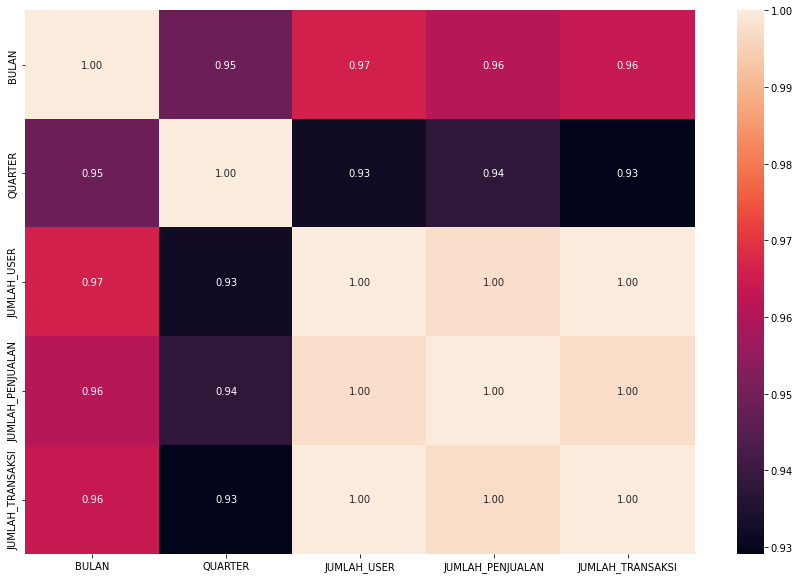

In [45]:
plt.figure(figsize=(15,10))
sns.heatmap(TOTAL_USER.corr(), annot=True, fmt='.2f')
plt.show()


Sebuah korelasi matriks digunakan untuk menyelidiki ketergantungan antara beberapa variabel pada saat yang sama. Hasilanya adalah label yang berisi korelasi koefisien antara masing-masing variabel dan lain-lain.
Sederhananya adalah menghitung hubungan antar variabel. Nilai korelasi berkisar antara -1 sampai 1.
-  Korelasi 1 berarti kedua variabel tersebut sangat berhubungan. Misalnya ada variabel A dan B. Jika nilai A naik maka pada kasus ini nilai B juga akan naik.

-  Korelasi -1 berarti kedua variabel tersebut berhubungan terbalik. Misalnya bila nilai A naik maka nilai B akan turun.

-  Jika korelasi 0 berarti kedua variabel itu tidak saling berhubungan.


Dalam kasus kali ini kita akan mencari nilai kolerasi mana yang paling berkaitan dengan jumlah user yang melakukan transaksi, dibandingkan dengan jumlah transaksi dan total penjualan. 

1. Nilai kolerasi jumlah user terhadap jumlah transaksi, dari heatmap diatas didapatkan nilai 1. Dapat diartikan bahwa kedua variabel tersebut sangat berhubungan. Semakin tinggi jumlah user maka semakin tinggi pula jumlah transaksi yang terjadi.

2. Nilai kolerasi jumlah user terhadap total penjualan, dari heatmap diatas didapatkan nilai 1. Dapat diartikan juga bahwa kedua variabel tersebut sangat berhubungan. Semakin tinggi jumlah user maka semakin tinggi pula jumlah/ total pendapatan yang didapatkan. 

Dapat disimpulkan bahwa kolerasi diantara jumlah_user, jumlah_transaksi, dan jumlah_penjualan, ketiganya memiliki kolerasi yg sejalan atau saling berhubungan. Dimana ketika salah satu jumlah menurun yang lain akan ikut turun, ketika salah satu jumlah naik maka kedua yang lainnya juga akan naik. Seperti tertera pada data yang telah dianalisis. 

**POIN ANALISIS**
1. Berikan kesimpulan dari laporan/informasi yang dibuat berdasarkan problem statement/poin penjabaran menggunakan bahasa awam! (boleh dalam beberapa paragraf)

Kesimpulan dari laporan/informasi yang dibuat berdasarkan problem statement/poin penjabaran diatas adalah : 

-  Jumlah transaksi terus mengalami peningkatan di setiap bulan nya. Pada quarter pertama di bulan ke 2 terdapat sedikit penurunan. Namun selebihnya jumlah transaksi dari bulan ke 2 dan seterusnya terus meningkat. Hingga di akhir quarter 3 jumlah transaksi adalah sebanyak 68960 transaksi. 

-  Jumlah penjualan terus mengalami peningkatan pula di setiap bulan nya. Pada quarter pertama di bulan ke 2 terdapat sedikit penurunan. Namun selebihnya jumlah transaksi dari bulan ke 2 dan seterusnya terus meningkat. Hal ini sejalan dengan jumlah transaksi yang terus meningkat, tingkat penjualan pun terus meningkat juga dari bulan ke bulan dan dari quarter ke quarter selanjutnya selama 3 quarter.Penjualan pada quarter 3 di bulan 9 mencapai jumlah penjualan paling tinggi yaitu 4100365.0 USD. Atau mengalami peningkatan sejumlah 10,82 % dari bulan sebelumnya.


-  Total user yang melakukan transaksi terus mengalami peningkatan di setiap bulan nya, kecuali di bulan 1 ke 2 yang mengalami sedikit penurunan. Selebihnya total_user dari bulan ke 2 dst terus meningkat. Hal ini sejalan dengan perhitungan dari soal nomor 1 dan 2 yaitu jumlah_transaksi dan jumlah_penjualan. Dapat kita asumsikan bahwa ketika jumlah user meningkat, jumlah transksi dan penjualan akan meningkat pula, sebaliknya jika jumlah user menurun , jumlah transaksi dan penjualan pun akan menurun.  Jumlah user tertinggi terdapat pada akhir quarter 3 yaitu sebesar 2398 user. 

-  Untuk kategori yang paling banyak dibeli di setiap bulannya adalah Jeans, apabila dijumlahkan total penjualan jeans sebanyak 21490  item dari beberapa bulan. Kategori ini paling sering muncul yaitu 6 bulan dari total 9 bulan. Dengan perhitungan ini perusahaan bisa menilai tren kategori apa saja yang laku terjual paling banyak, dan bisa membuat lebih banyak lagi variasi dan inovasi di kategori tersebut. Untuk jumlah maksimum terjualnya ada pada kategori Jeans yaitu sejumlah 5091 di bulan 9.

-  Untuk kategori apa saja yang paling banyak mendapatkan pendapatan, nilai paling tinggi atau pendapatan maksimum terdapat di bulan ke 9 quarter 3 yaitu sebesar 574564.88 USD dalam kategori Outwear & Coats. Kategori yang paling banyak muncul pun adalah kategori tersebut. Meskipun sebelumnya di soal nomor 4 dalam menghitung kategori apa saja yang paling banyak terjual item nya, kategori yang paling sering terjual adalah jeans, namun di dalam menghitung total pendapatan hal yang mempengaruhi perbedaan ini adalah harga atau sales_price dari kategori-kategori tersebut. Jika jeans lebih banyak terjual item nya namun harganya tidak seberapa maka tidak akan meningkatkan pendapatan yang signifikan. Sebaliknya untuk kategori Outwear & Coats meskipun item yang terjual tidak maksmimum namun karena harga nya relatif lebih tinggi dari jeans, maka pendapatan yang didapatkan pun lebih banyak dari jeans. 

- Nilai kolerasi mana yang paling berkaitan dengan jumlah user yang melakukan transaksi, dibandingkan dengan jumlah transaksi dan total penjualan, didapatkan hasil: 

1. Nilai kolerasi jumlah user terhadap jumlah transaksi, didapatkan nilai 1. Dapat diartikan bahwa kedua variabel tersebut sangat berhubungan. Semakin tinggi jumlah user maka semakin tinggi pula jumlah transaksi yang terjadi.

2. Nilai kolerasi jumlah user terhadap total penjualan, didapatkan nilai 1. Dapat diartikan juga bahwa kedua variabel tersebut sangat berhubungan. Semakin tinggi jumlah user maka semakin tinggi pula jumlah/ total pendapatan yang didapatkan. 

Dapat disimpulkan bahwa kolerasi diantara jumlah_user, jumlah_transaksi, dan jumlah_penjualan, ketiganya memiliki kolerasi yg sejalan atau saling berhubungan. Dimana ketika salah satu jumlah menurun yang lain akan ikut turun, ketika salah satu jumlah naik maka kedua yang lainnya juga akan naik. Seperti tertera pada data yang telah dianalisis.


**PROBLEM STATEMENT MENGGUNAKAN SMART**

Specific,Measurable,Achievable,Relevant,Time-bound
-  What do you want to accomplish?
Menaikan total penjualan dengan melakukan inovasi atau pemberagaman produk di kategori yang paling banyak terjual serta menaikan harga.
-  How will you know when you have accomplished your goal?
Menaikan pendapatan sebesar 10 % dibanding quarter sebelumnya. 
-  How can the goal be accomplished?
Berdasarkan presentase kenaikan total penjualan sebelumnya dari quarter 1 hingga 3,kenaikan pada bulan terakhir adalah sebesar 10,82 % yaitu di bulan 9 quarter 3.
-  Will the goal meet your short- and long-term needs?
Dalam jangka pendek menaikan total penjualan di quarter 4 2022.
Dalam jangka panjang produk akan semakin beragam dan menaikan jumlah user.
-  When will the goal be accomplished?
Quartal ke 4 tahun 2022.


Problem Statement : 

"Menaikan total penjualan sebesar 10 % berdasarkan presentase kenaikan total penjualan sebelumnya dari quarter 1 hingga 3, dengan melakukan inovasi atau pemberagaman produk dan menaikan harga di kategori yang paling banyak terjual  di quartal 4 tahun 2022."



**POIN PERTANYAAN**
1. Apakah problem statement yang kamu definisikan di awal dapat terukur ketercapaiannya? berikan pendapatmu!

Jawab :  
Ya, Problem statement yang sudah didefinisikan sebelumnya dapat terukur ketercapaiannya. Menurut hasil analisis yang dilakukan kenaikan 10% cukup terukur karena kenaikan terakhir adalah sebesar 10,82 %. Tantangannya adalah karena kita akan menaikan harga di kategori yang paling banyak terjual maka target kenaikan yang ditargetkan tidak melampaui kenaikan terakhir. 

2. Berdasarkan hasil analisis yang sudah kamu lakukan dari 6 penjabaran di atas, jika CEO perusahaanmu ingin menargetkan pendapatan di awal kuartal 4 harus mencapai $250000, apakah masuk akal?

Jawab: 

Ya, masuk akal. Berdasarkan hasil analisis yang dilakukan pada total penjualan total yang didapatkan adalah sebesar 4100365.0 USD diakhir quartal 3. Sehingga sangat masuk akal apabila target sebesar 250000 USD di awal quartal 4 bisa tercapai.

3. CEO kamu menargetkan di kuartal 4 ada investor yang dapat menyuntikan dana ke perusahaanmu, dimana investor akan melihat GMV selama 3 kuartal terakhir serta prospek kedepan minimal di kuartal 4 akan seperti apa. Berikan informasi kepada CEO mu berdasarkan trend transaksi, jumlah user yang bertransaksi, dan GMV 3 kuartal terakhir, apakah perusahaanmu layak atau tidak mendapatkan investor baru!

Jawab : 


-  Untuk jumlah transaksi terus mengalami peningkatan di setiap bulan nya. Pada quarter pertama di bulan ke 2 terdapat sedikit penurunan. Namun selebihnya jumlah transaksi dari bulan ke 2 dan seterusnya terus meningkat. Hingga di akhir quarter 3 jumlah transaksi adalah sebanyak 68960 transaksi. Untuk kategori yang paling banyak dibeli di setiap bulannya adalah Jeans, apabila dijumlahkan total penjualan jeans sebanyak 21490 item dari beberapa bulan. Kategori ini paling sering muncul yaitu 6 bulan dari total 9 bulan. 

-  Total user yang melakukan transaksi terus mengalami peningkatan di setiap bulan nya, kecuali di bulan 1 ke 2 yang mengalami sedikit penurunan. Selebihnya total_user dari bulan ke 2 dst terus meningkat. Hal ini sejalan dengan perhitungan jumlah_transaksi. Total user di akhir quarter 3 adalah sejumlah 2398 user yang aktif bertransaksi. 

-  Jumlah penjualan terus mengalami peningkatan pula di setiap bulan nya. Pada quarter pertama di bulan ke 2 terdapat sedikit penurunan. Namun selebihnya jumlah transaksi dari bulan ke 2 dan seterusnya terus meningkat. Hal ini sejalan dengan jumlah transaksi yang terus meningkat, tingkat penjualan pun terus meningkat juga dari bulan ke bulan dan dari quarter ke quarter selanjutnya selama 3 quarter.Penjualan pada akhir quarter 1 mencapai 2235412.0 USD, untuk akhir quarter 2 mencapai 2580496.0 USD, dan di akhir quarter 3 mencapai jumlah penjualan paling tinggi yaitu 4100365.0 USD. 

-  Dilihat dari jumlah penjualan yang terus meningkat di setiap quartal nya dapat disimpulkan bahwa perusahaan layak mendapatkan investor baru di kuartal ke 4. 






 

